# Radar Range Equation Simulation
### (based on "Introduction to Electronic Warfare" by David L. Adamy)

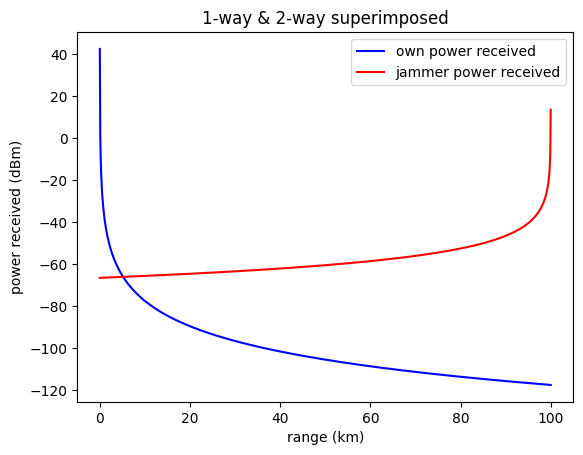

In [195]:
import numpy as np
import matplotlib.pyplot as plt

#input values
Pt = 1e8                        # XMTR Power in watts
Gt = 30                         # XMTR Gain in dBm 
Gr = 30                         # RCVR Gain in dBm
freq = 5e9                      # Signal Frequency in Hz
sigma = 1                       # Radar Cross Section (RCS) in metres^2
wl = 3e8 / freq                 # Signal Wavelength in metres
ERPj = 50                       # Pj * Gj in dBm
epsilon = 1e-2                  # Small value to prevent division by zero

x_lower = epsilon
x_upper = x_lower + 100
x = np.linspace(x_lower, x_upper, 1000)       # Range values in kilometres

y_two = (Pt * wl**2)                          # Power received in 2-way Tx
y_two = y_two / (4 * math.pi)**3
y_two = y_two / (x*1000)**4
y_two = 10* np.emath.logn(10, y_two)
y_two += Gt + Gr 

y_one = (wl**2)                               #Power received in 1-way Tx
y_one = y_one / (4*math.pi*(-x+x_upper+x_lower)*1000)**2
y_one = 10*np.emath.logn(10, y_one)
y_one += Gr + ERPj

#create plot
plt.plot(x, y_two, c = 'b', label="own power received")
plt.plot(x, y_one, c = 'r', label="jammer power received")
plt.legend(loc='upper right')
plt.xlabel("range (km)")
plt.ylabel("power received (dBm)")
plt.title("1-way & 2-way superimposed")
plt.show()